# Pulser backends

A `QuantumProgram` can be easily run on multiple backends provided by Pasqal:
- locally installed emulators
- remote cloud emulators
- QPUs

Remote emulators and QPU **require** credentials to submit a job.

### A basic analog quantum program

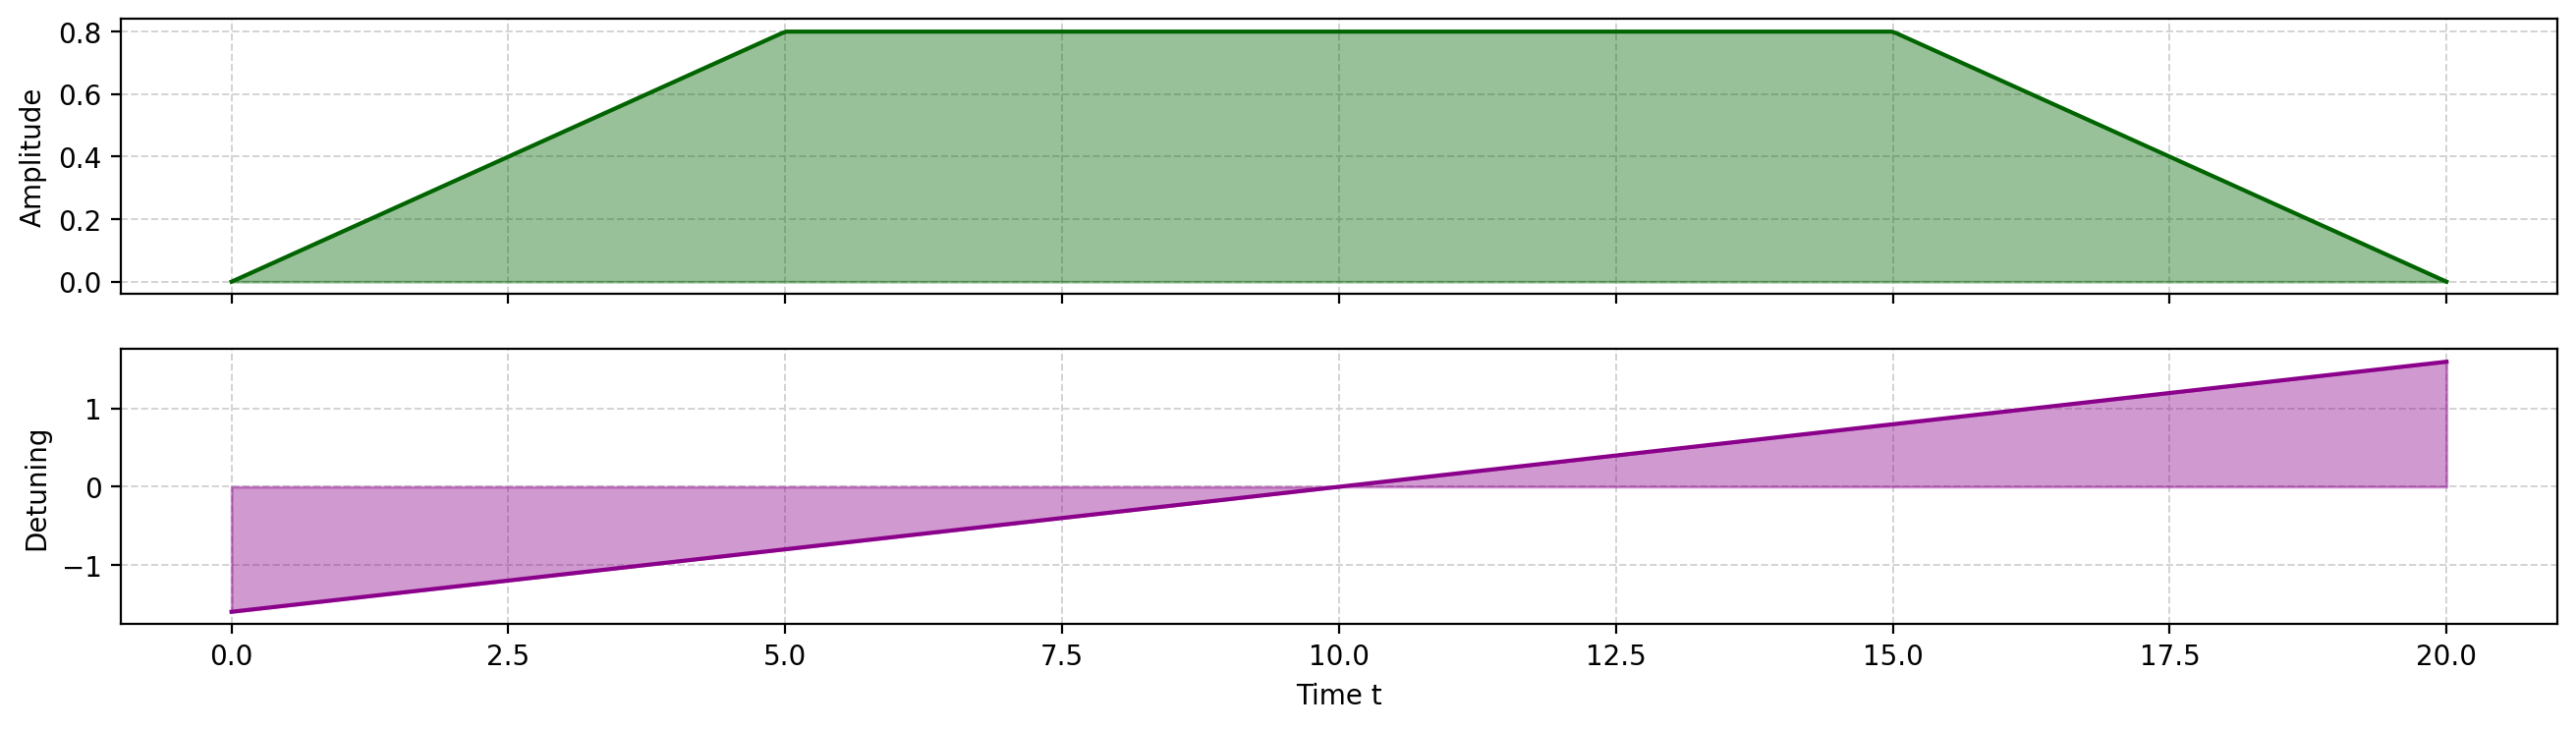

In [1]:
from qoolqit import Drive, PiecewiseLinear, QuantumProgram, Ramp, Register

# Create the register
register = Register.from_coordinates([(0,1), (0,-1)])

# Defining the drive parameters
omega = 0.8
delta_i = -2.0 * omega
delta_f = -delta_i
T = 20.0

# Defining the drive 
wf_amp = PiecewiseLinear([T/4, T/2, T/4], [0.0, omega, omega, 0.0])
wf_det = Ramp(T, delta_i, delta_f)
drive = Drive(amplitude = wf_amp, detuning = wf_det)

# Writing the quantum program
program = QuantumProgram(register, drive)
program.draw()

## Compile the program
A program must be compiled to a specific device to be run.

In [2]:
from qoolqit import AnalogDevice

program.compile_to(device=AnalogDevice())

### Import the entry point backend

In [3]:
from qoolqit.pulserbackend import PulserBackend

### Local backends emulators

In [4]:
from emu_mps import MPSBackend
from emu_sv import SVBackend
from pulser_simulation import QutipBackendV2

In [27]:
backend = PulserBackend(backend_type=SVBackend)
result = backend.run(program)

In [6]:
backend = PulserBackend(backend_type=QutipBackendV2)
result = backend.run(program)

In [7]:
backend = PulserBackend(backend_type=MPSBackend, runs=200) # evaluation_times
result = backend.run(program)

## Remote emulators

### Setup a Pasqal connection

In [8]:
import os

from pulser_pasqal import PasqalCloud

USERNAME = os.getenv("PCP_USER")
PROJECT_ID = os.getenv("PCP_PROJECT_ID")
PASSWORD = os.getenv("PCP_PASSWORD")

connection = PasqalCloud(
    username=USERNAME,  # Your username or email address for the Pasqal Cloud Platform
    password=PASSWORD,  # The password for your Pasqal Cloud Platform account
    project_id=PROJECT_ID,  # The ID of the project associated to your account
)

### Import remote backends emulators

In [9]:
from pulser_pasqal.backends import EmuFreeBackendV2, EmuMPSBackend  # soon: EmuSVBackend

In [ ]:
backend = PulserBackend(backend_type=EmuFreeBackendV2, connection=connection, wait=True)
#result = backend.run(program)

In [11]:
backend = PulserBackend(backend_type=EmuMPSBackend, connection=connection)
#result = backend.run(program)

## QPU backend (Not supported yet)
The same connection can also be used to send the program to run on an actual QPU.

In [12]:
from pulser.backend import QPUBackend

backend = PulserBackend(backend_type=QPUBackend, connection=connection)
#result = backend.run(program)